In [ ]:
import numpy as np
import time
def jacobi(A, b, eps=1e-8, max_iter=1000):
    n = len(A)
    D = np.diag(A)            # диагональная матрица
    L = np.tril(A, -1)        # нижняя треугольная матрица
    U = np.triu(A, +1)        # верхняя треугольная матрица

    if np.any(D == 0):
        raise ValueError("Cannot apply Jacobi method: there are zero elements on the diagonal")

    x = np.zeros(n)           # начальное приближение x^(0)
    for i in range(max_iter):
        x_new = (b - L.dot(x) - U.dot(x)) / D
        if np.linalg.norm(x_new - x) < eps:
            return x_new
        x = x_new
    return x



In [ ]:

import numpy as np

def generate(k, n):
    """
    Generates matrix A^(k) and vector F^(k) for given k and n.
    """
    np.random.seed(42)
    A = np.zeros((n, n))
    for i in range(n):
        row_sum = 0
        for j in range(n):
            if i != j:
                A[i, j] = np.random.choice([-1, -2, -3, -4])
                row_sum += abs(A[i, j])
        A[i, i] = -(row_sum + 10**(-k) if i == 0 else row_sum)
    x = np.arange(1, n + 1)
    F = A @ x
    return A, F



In [ ]:
from numpy.linalg import norm, cond
from tabulate import tabulate

table_data = []
cond_list = []
rel_err_list = []
for k in range(1, 5):
    for n in [10, 50, 100, 200, 1000]:
        A, F = generate(k, n)
        x_true = np.arange(1, n + 1)

        # Вычисление числа обусловленности
        k_A = cond(A)
        cond_list.append(k_A)
        # Решение системы методом Якоби
        x = jacobi(A, F)
        Relative_error = norm(x - x_true) / norm(x_true)
        Absolute_error = np.linalg.norm(A @ x - F)
        rel_err_list.append(Relative_error)
        table_data.append((k, n, k_A, Relative_error,Absolute_error ))

headers = ["k", "n", "Condition number", "Relative error", "Absolute error"]
print(tabulate(table_data, headers=headers))


  k     n    Condition number    Relative error    Absolute error
---  ----  ------------------  ----------------  ----------------
  1    10             2.82992          0.561002     528.058
  1    50             2.59004          0.854648   42978.2
  1   100             2.37739          0.867071  249218
  1   200             2.22437          0.867581       1.41493e+06
  1  1000             2.10441          0.865829       7.90231e+07
  2    10             2.8316           0.838847     789.448
  2    50             2.59001          0.866534   43575.6
  2   100             2.37739          0.869773  249994
  2   200             2.22437          0.868404       1.41627e+06
  2  1000             2.10441          0.865859       7.90259e+07
  3    10             2.83178          0.873413     821.964
  3    50             2.59001          0.867733   43635.8
  3   100             2.37739          0.870044  250072
  3   200             2.22437          0.868487       1.41641e+06
  3  1000       

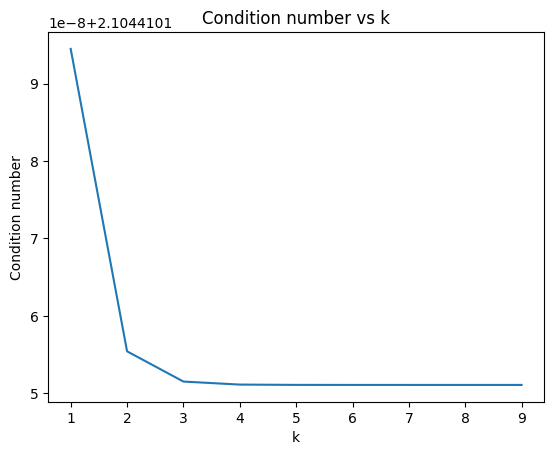

In [ ]:
import matplotlib.pyplot as plt

n = 1000
k_values = range(1,10)
condition_numbers = []

for k in k_values:
    A, F = generate(k, n)
    k_A = cond(A)
    condition_numbers.append(k_A)

plt.plot(k_values, condition_numbers)
plt.title('Condition number vs k')
plt.xlabel('k')
plt.ylabel('Condition number')
plt.show()


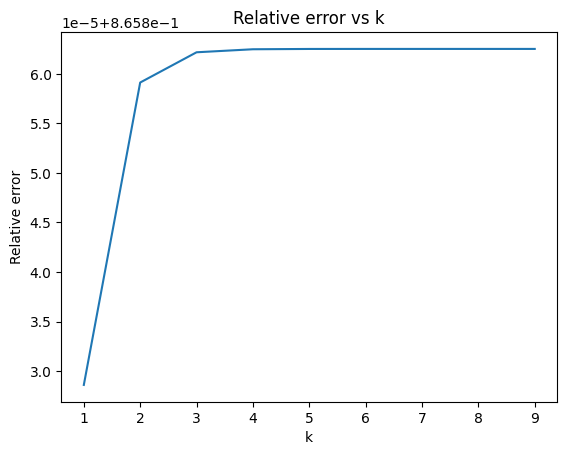

In [ ]:
n = 1000
k_values = range(1, 10)
relative_errors = []

for k in k_values:
    A, F = generate(k, n)
    x_true = np.arange(1, n + 1)
    x = jacobi(A, F)
    relative_error = norm(x - x_true) / norm(x_true)
    relative_errors.append(relative_error)

plt.plot(k_values, relative_errors)
plt.title('Relative error vs k')
plt.xlabel('k')
plt.ylabel('Relative error')
plt.show()


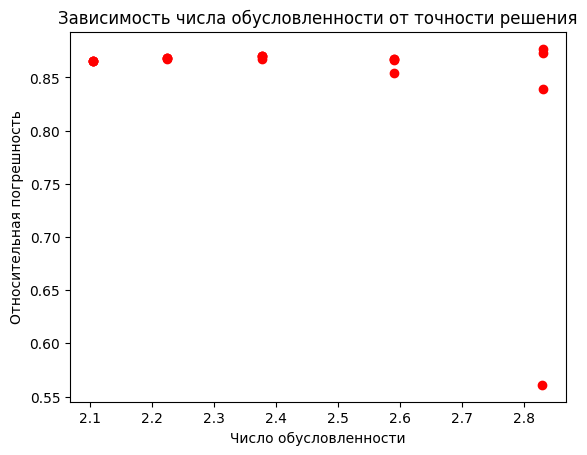

In [ ]:
plt.plot(cond_list,rel_err_list, 'ro')
plt.title('Зависимость числа обусловленности от точности решения')
plt.xlabel('Число обусловленности')
plt.ylabel('Относительная погрешность')
plt.show()


interactive(children=(IntSlider(value=0, description='elev', max=0), IntSlider(value=40, description='azim', m…

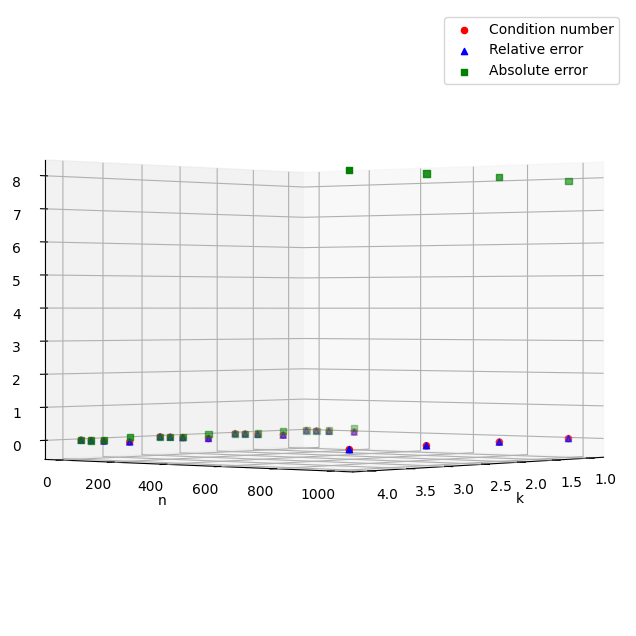

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Извлечение данных из таблицы
k_values = np.array([row[0] for row in table_data])
n_values = np.array([row[1] for row in table_data])
k_A_values = np.array([row[2] for row in table_data])
relative_error_values = np.array([row[3] for row in table_data])
absolute_error_values = np.array([row[4] for row in table_data])

# Увеличение размера графика и добавление возможности вращения
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение графика
ax.scatter(k_values, n_values, k_A_values, c='r', marker='o', label='Condition number')
ax.scatter(k_values, n_values, relative_error_values, c='b', marker='^', label='Relative error')
ax.scatter(k_values, n_values, absolute_error_values, c='g', marker='s', label='Absolute error')

# Настройка осей и легенды
ax.set_xlabel('k')
ax.set_ylabel('n')
ax.set_zlabel('Values')
ax.legend()

# Добавление возможности вращения графика
def rotate_graph(elev, azim):
    ax.view_init(elev=elev, azim=azim)

from ipywidgets import interact

interact(rotate_graph, elev=(0, 0), azim=(-100, 180))

plt.show()


interactive(children=(IntSlider(value=17, description='elev', max=35), IntSlider(value=30, description='azim',…

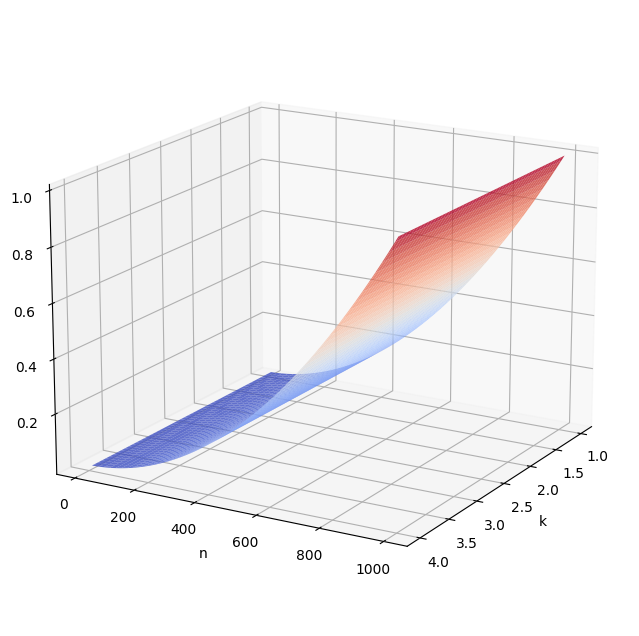

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Извлечение данных из таблицы
k_values = np.array([row[0] for row in table_data])
n_values = np.array([row[1] for row in table_data])
k_A_values = np.array([row[2] for row in table_data])
relative_error_values = np.array([row[3] for row in table_data])
absolute_error_values = np.array([row[4] for row in table_data])

# Увеличение размера графика и добавление возможности вращения
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Построение плоскости/функции
k_range = np.linspace(min(k_values), max(k_values), 100)
n_range = np.linspace(min(n_values), max(n_values), 100)
k_grid, n_grid = np.meshgrid(k_range, n_range)

def my_function(k, n):
    return k + n**2

z_grid = my_function(k_grid, n_grid)

ax.plot_surface(k_grid, n_grid, z_grid, cmap='coolwarm', alpha=0.8)

# Настройка осей и легенды
ax.set_xlabel('k')
ax.set_ylabel('n')
ax.set_zlabel('Values')

# Добавление возможности вращения графика
def rotate_graph(elev, azim):
    ax.view_init(elev=elev, azim=azim)

from ipywidgets import interact

interact(rotate_graph, elev=(0, 35), azim=(-120, 180))

plt.show()


